# Strawberry Purees  Authentication

This project uses strawberry purees an example to show how to determine authentation product from adulterated samples. The prediction is based on analysis of mid-IR (1800 cm-1 to 900 cm-1 or 5.5 micron to 11.1 micron) IR range. The data are public available through Quadram Institute (https://asu.quadram.ac.uk/example-datasets-for-download/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('MIR_Fruit_purees.csv')

In [3]:
# columns include Wavenumbers and Non-strawberrys, and Strawberrys
df.columns

Index(['Wavenumbers', 'NON-Strawberry', 'NON-Strawberry.1', 'NON-Strawberry.2',
       'NON-Strawberry.3', 'NON-Strawberry.4', 'NON-Strawberry.5',
       'NON-Strawberry.6', 'NON-Strawberry.7', 'NON-Strawberry.8',
       ...
       'NON-Strawberry.622', 'NON-Strawberry.623', 'NON-Strawberry.624',
       'NON-Strawberry.625', 'NON-Strawberry.626', 'NON-Strawberry.627',
       'NON-Strawberry.628', 'NON-Strawberry.629', 'NON-Strawberry.630',
       'NON-Strawberry.631'],
      dtype='object', length=984)

In [4]:
# total non-strawberry samples 632 samples
print('The number of non-strawberry samples are: {}'.format(len([i for i in df.columns if i.startswith('NON')])))

# total strawberry samples 351 samples
print('The number of strawberry samples are: {}'.format(len([i for i in df.columns if i.startswith('Straw')])))

The number of non-strawberry samples are: 632
The number of strawberry samples are: 351


In [5]:
#make a new copy of df
df_new = df.copy()

# Set wavenumber as index
df_new = df_new.set_index('Wavenumbers')

# Set the columns to be 1 if sample is strawberry, otherwise set to 0
df_new.columns = [int(i.startswith('Straw')) for i in df_new.columns]

df_new_transform = df_new.T
df_new_transform = df_new_transform.reset_index()

df_new_transform.head()

Wavenumbers,index,899.327,903.187,907.047,910.9069999999999,914.7669999999999,918.627,922.487,926.347,930.207,...,1767.8239999999998,1771.684,1775.5439999999999,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.5639999999999
0,0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,...,0.000562,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009
1,0,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,...,0.000022,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005
2,0,0.002416,0.002480,0.002511,0.002611,0.002802,0.003031,0.003235,0.003316,0.003257,...,0.000449,0.000290,0.000185,0.000137,0.000090,0.000062,0.000031,0.000009,0.000007,0.000007
3,0,0.002345,0.002292,0.002249,0.002303,0.002466,0.002642,0.002703,0.002671,0.002618,...,0.000613,0.000419,0.000267,0.000179,0.000119,0.000075,0.000043,0.000021,0.000008,0.000008
4,0,0.002303,0.002342,0.002350,0.002419,0.002561,0.002737,0.002862,0.002860,0.002811,...,0.000713,0.000468,0.000299,0.000212,0.000140,0.000099,0.000054,0.000020,0.000012,0.000012


In [6]:
# assign x and y, x is spectrum data, y is labels
x = df_new_transform.iloc[:,1:]
y = df_new_transform.iloc[:,0]

In [7]:
# Assign strawberry and non-strawberry data to x_fruit and x_non_fruit respectively
x_fruit = x.loc[y==1]
x_non_fruit= x.loc[y==0]

x_fruit_avg = np.mean(x_fruit)
x_non_fruit_avg = np.mean(x_non_fruit)

## Section 1. Data Visualization by heatmap and plot

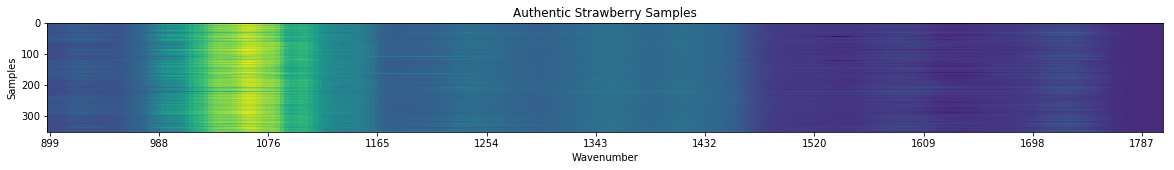

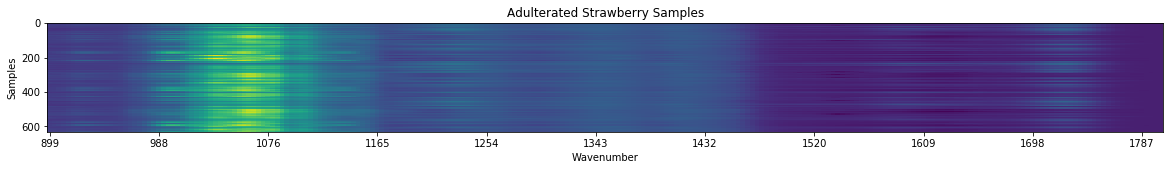

In [8]:
wavenumbers = len(x_fruit.columns)
wavenumbers_non_fruit = len(x_non_fruit.columns)

# Heatmap comparision of strawberry and non-strawberry samples
plt.figure(figsize=(20,2))
plt.imshow(x_fruit, aspect='auto')
_ = plt.xticks(range(0,wavenumbers,wavenumbers//10), ([int(i) for i in x_fruit.columns[::wavenumbers//10]]))
plt.xlabel('Wavenumber')
plt.title('Authentic Strawberry Samples')
plt.ylabel('Samples')

plt.figure(figsize=(20,2))
plt.imshow(x_non_fruit, aspect = 'auto')
_ = plt.xticks(range(0,wavenumbers_non_fruit,wavenumbers_non_fruit//10), ([int(i) for i in x_non_fruit.columns[::wavenumbers_non_fruit//10]]))
plt.title('Adulterated Strawberry Samples')
plt.xlabel('Wavenumber')
plt.ylabel('Samples')

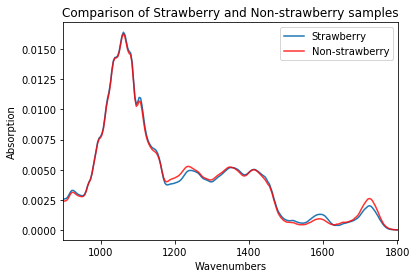

In [9]:
# Plot Comparison of strawberry and non-strawberry samples
plt.plot(x_fruit_avg, label = 'Strawberry')
plt.plot(x_non_fruit_avg, color = 'red', alpha = 0.8, label = 'Non-strawberry')
plt.legend(loc = 'best')
plt.xlim(min(x_fruit_avg.index), max(x_fruit_avg.index))
plt.xlabel('Wavenumbers')
plt.ylabel('Absorption')
plt.title('Comparison of Strawberry and Non-strawberry samples')

Plot interactive ploty graph

In [10]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

In [11]:
data1 = go.Scatter(x = x_fruit_avg.index, y = x_fruit_avg, line = dict(color = 'green'), name = 'Authentic Strawberry')
data2 = go.Scatter(x = x_non_fruit_avg.index, y = x_non_fruit_avg, line = dict(color='red'), name = 'Adulterated Strawberry')
layout = go.Layout(title = 'Comparison of Strawberry and Non-strawberry samples', xaxis = dict(title = 'Wavenumbers'),
                  yaxis = dict(title = 'Absorption'))
fig = dict(data = [data1, data2], layout = layout)

py.iplot(fig)

From this graph, we can see there might be three regions that authentic and adulterated samples differ(e.g., 1700-1750, 1550-1620 and 1180-1250 regions). We will have a discussion later on

## Section 2. PCA visualization

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
x_transform = pca.fit_transform(x)

It seems like in the sample projection on first two principal components, authentic and adulterated samples could be efficiently seperated by radial boundary. In this case, non-linear method (e.g., knn, rf, and svm) might perform better than linear classification method(e.g., logistic). We will have a discussion later.

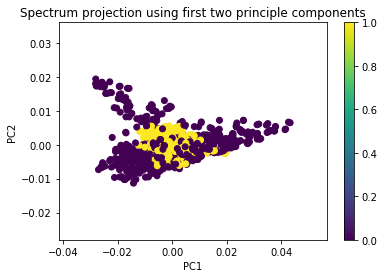

In [13]:
plt.scatter(x_transform[:,0],x_transform[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectrum projection using first two principle components')
plt.colorbar()

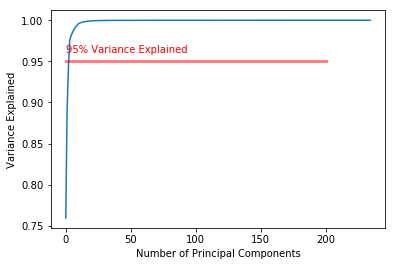

In [14]:
# Plot variance explaiend vs. number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,200], [0.95, 0.95], color = 'red', linewidth = 3, alpha = 0.5)
plt.annotate('95% Variance Explained', xy=(0,0.96), xytext=(0,0.96), color = 'r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')

In [15]:
# Using first 4 principle components, the variance could be efficiently explained (98% variance explained)
np.sum(pca.explained_variance_ratio_[:4])

0.97550780846436103

## Section 3. Modeling

We would like to know how many number of principal componets do we need to have more accurate predictions, so we ranged the number of principle components within each model (1 to 19) and select the one that rendered the highest accuracy of prediction. It turns out that on average, the first 9 principle components provided the best prediction accuracy.

In [16]:
# Define the report

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

def report(model, y, predict):
    print('Report of ' + model)
    print('=================================================================================')
    print('Accuracy of the model:{}'.format(accuracy_score(y, predict)))
    print('AUC score:            {}'.format(roc_auc_score(y, predict)))
    print('F1 score:             {}'.format(f1_score(y, predict)))
    print('Confusion Matrix:')
    print(confusion_matrix(y, predict))

#### 1. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [18]:
score = []
for i in range(1,20):
    xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:i], y, test_size = 0.3, random_state=1)
    param = {'n_estimators': 10**np.arange(3), 'max_features': ['auto','sqrt','log2']}
    gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param)
    gs_rf.fit(xtrain, ytrain)
    rf_predict = gs_rf.predict(xtest)
    score.append(accuracy_score(ytest, rf_predict))

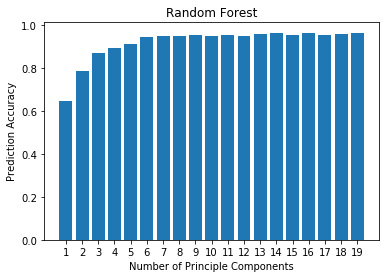

In [19]:
#Plot the accuracy vs. Number of principle components for RF
plt.bar(range(1,20),score)
_ = plt.xticks(range(1,20,1))
plt.xlabel('Number of Principle Components')
plt.ylabel('Prediction Accuracy')
plt.title('Random Forest')

In [20]:
# Assign train and test sets using 9 principle components
xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:9], y, test_size = 0.3, random_state=1)

In [21]:
param = {'n_estimators': 10**np.arange(3), 'max_features': ['auto','sqrt','log2']}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param)
gs_rf.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,  10, 100], dtype=int32), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
rf_predict = gs_rf.predict(xtest)

In [23]:
# Generate performance report of Random Forest
report('random forest', ytest, rf_predict)

Report of random forest
Accuracy of the model:0.9525423728813559
AUC score:            0.9434670931472328
F1 score:             0.9363636363636364
Confusion Matrix:
[[178   3]
 [ 11 103]]


#### 2. KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
score_knn = []
for i in range(1,20):
    xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:i], y, test_size = 0.3, random_state=1)
    param = {'n_neighbors': range(1,11)}
    gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param)
    gs_knn.fit(xtrain, ytrain)
    knn_predict = gs_knn.predict(xtest)
    score_knn.append(accuracy_score(ytest, knn_predict))

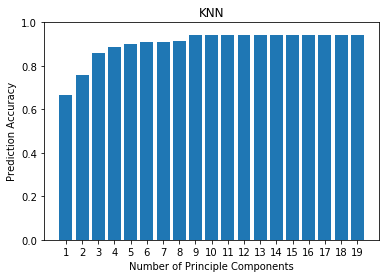

In [26]:
plt.bar(range(1,20), score_knn)
_ = plt.xticks(range(1,20,1))
plt.ylim(0,1.0)
plt.xlabel('Number of Principle Components')
plt.ylabel('Prediction Accuracy')
plt.title('KNN')

In [27]:
# Assign train and test sets using 9 principle components
xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:9], y, test_size = 0.3, random_state=1)

param = {'n_estimators': 10**np.arange(3), 'max_features': ['auto','sqrt','log2']}
gs_knn = GridSearchCV(RandomForestClassifier(), param_grid=param)
gs_knn.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,  10, 100], dtype=int32), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
knn_predict = gs_knn.predict(xtest)

In [29]:
# Generate performance report of Random Forest
report('knn', ytest, knn_predict)

Report of knn
Accuracy of the model:0.9491525423728814
AUC score:            0.9407046622080062
F1 score:             0.9321266968325793
Confusion Matrix:
[[177   4]
 [ 11 103]]


#### 3. SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
score_svc = []
for i in range(1,20):
    xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:i], y, test_size = 0.3, random_state=1)
    pipe = make_pipeline(StandardScaler(), SVC())
    param_grid = [{'svc__gamma': [10**i for i in range(-3,3)], 'svc__C':[10**i for i in range(-3,3)]}]
    gs_svc = GridSearchCV(pipe, param_grid=param_grid)
    gs_svc.fit(xtrain, ytrain)
    svc_predict = gs_svc.predict(xtest)
    score_svc.append(accuracy_score(ytest, svc_predict))

In [ ]:
plt.bar(range(1,20),score_svc)
_ = plt.xticks(range(1,20,1))

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_transform[:,:9], y, test_size = 0.3, random_state=1)

pipe = make_pipeline(StandardScaler(), SVC(probability=True))
param_grid = [{'svc__gamma': [10**i for i in range(-3,3)], 'svc__C':[10**i for i in range(-3,3)]}]
gs_svc = GridSearchCV(pipe, param_grid)
gs_svc.fit(xtrain, ytrain)

In [ ]:
svc_predict = gs_svc.predict(xtest)

In [ ]:
report('svc', ytest, svc_predict)

#### 4. Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param = {'C': [10**i for i in range(-4,3)]}
gs_logistic = GridSearchCV(LogisticRegression(), param)
gs_logistic.fit(xtrain, ytrain)

In [ ]:
logistic_predict = gs_logistic.predict(xtest)

In [ ]:
report('logistic', ytest, logistic_predict)

Interesting results! It seems like logistic regression predict all test samples to be negative(adulterated) samples. The boundary between adulterated and authetic samples is not linear, that is why logistic regression cannot seperated the samples efficiently, instead, it just predict all the samples to be adulterated. 

#### 5. Ensemble model by voting
Herein, we used svc, rf and knn as voting methods, and it turns out the ensemble method performs similar as SVM. So we keep using svm for further discussion.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# We used svc, rf and knn together to predict cancer
eclf = VotingClassifier(estimators=[('svc', gs_svc.best_estimator_), ('rf', gs_rf.best_estimator_), ('knn', gs_knn.best_estimator_)], voting='hard')
eclf.fit(xtrain, ytrain)

In [ ]:
eclf_predict = eclf.predict(xtest)

In [ ]:
report('Ensemble', ytest, eclf_predict)

## Section 5. What does the misclassfied samples look like? 

In [ ]:
# Extract the misclassfied samples and take the average
misclassfied_y = y.loc[ytest.index[svc_predict != ytest]]

misclassified_x_authentic_avg = np.mean(x.loc[misclassfied_y.index[misclassfied_y==1]])

misclassified_x_adulterated_avg = np.mean(x.loc[misclassfied_y.index[misclassfied_y==0]])

In [ ]:
# Plot interactive plotly graph to show the difference between misclassfied samples and authentic and adulterated samples
data1 = go.Scatter(x = x_fruit_avg.index, y = x_fruit_avg, line = dict(color = 'green'), name = 'Authentic Strawberry')
data2 = go.Scatter(x = x_non_fruit_avg.index, y = x_non_fruit_avg, line = dict(color='red'), name = 'Adulterated Strawberry')
data3 = go.Scatter(x = misclassified_x_authentic_avg.index, y = misclassified_x_authentic_avg, line = dict(color = 'blue'),name = 'Misclassified Authentic')
data4 = go.Scatter(x = misclassified_x_adulterated_avg.index, y = misclassified_x_adulterated_avg, line = dict(color = 'yellow'),name = 'Misclassified Adulterated')

layout = go.Layout(title = 'Comparison of Strawberry and Non-strawberry samples')
fig = dict(data = [data1, data2,data3, data4], layout = layout)

py.iplot(fig)

## Section 6. Random Forest to select the most important features

In [ ]:
rf = RandomForestClassifier()
rf.fit(x, y)

In [ ]:
rf_predict = rf.predict(x)

important_index = np.argsort(rf.feature_importances_)[::-1]

In [ ]:
plt.plot(np.cumsum(np.sort(rf.feature_importances_)[::-1]))
plt.xlabel('Number of important features')
plt.ylabel('Variance Explained')
plt.annotate('95% Variance Explained', xy=(0,1), xytext=(0,0.98), color = 'r')
plt.plot([0,200],[0.95,0.95], linewidth = 3, color = 'red', alpha = 0.5)
plt.title('Variance explained by number of important features')

Do the selected features make sense in terms of chemistry? Let's select the top ten important features for discussion

In [ ]:
# Top ten important features from more important to less important
x.columns[important_index][:10]

In [ ]:
# Replot the comparison between authentic and adulterated samples
data1 = go.Scatter(x = x_fruit_avg.index, y = x_fruit_avg, line = dict(color = 'green'), name = 'Authentic Strawberry')
data2 = go.Scatter(x = x_non_fruit_avg.index, y = x_non_fruit_avg, line = dict(color='red'), name = 'Adulterated Strawberry')
layout = go.Layout(title = 'Comparison of Strawberry and Non-strawberry samples')
fig = dict(data = [data1, data2], layout = layout)

py.iplot(fig)

It is surprised to see the big difference between 1700-1750 is less determinant to the prediction. It is true however, because the region represents typical sugar C=O aldehydes/ketones signals(herein glucose or fructose signal), where it is very easy to blend into samples. It seems like 1550-1620 and 1180-1250 regions are within the top 10 regions determining the authentation of samples, which corespond to aromatic C=C double bonds and S=O bounds naturally occured in real sample. The above two regions are 'fingerprint' regions of strawberry purees that differentiate the authentic samples from adulterated samples.